<a href="https://colab.research.google.com/github/sanglee/BIML2019/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
'''
CNN to classify MNIST handwritten digits
'''

import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

# Read in MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

# Parameters
learning_rate = 0.001
training_iters = 20000
batch_size = 128
display_step = 10

# Network Parameters
n_input = 784 # input image shape = 28*28 grey scale
n_classes = 10 # 10 classes (0-9 digits)
dropout = 0.25 # probability to remove units during dropout

Using TensorFlow backend.


Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


In [0]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)


In [0]:
def reshape(x, xdim, ydim):
    return tf.reshape(x, shape=[-1, xdim, ydim, 1])

def conv2d(x, filters, size, stride=1):
    out = tf.layers.conv2d(x, filters=filters, kernel_size=[size,size], strides=[stride, stride], padding='same',
                         activation='relu', 
                         kernel_initializer=tf.contrib.layers.xavier_initializer(),
                         bias_initializer=tf.zeros_initializer())
    return out

def maxpool2d(x, size=2, stride=2):
    # MaxPool2D wrapper
    return tf.layers.max_pooling2d(x, pool_size=[size, size], strides=[stride, stride], padding='same')

In [0]:
# Create model
def conv_net(x, weights, biases, dropout):
    # Reshape input picture
    x = reshape(x, 28, 28)

    # Convolution Layer
    conv1 = conv2d(x, 32, 5)
    print("Conv 1 = ", conv1)
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, size=2, stride=2)
    print("Conv 1 = ", conv1)

    # Fully connected layer
    fc1 = tf.layers.dense(tf.layers.flatten(conv1), units=1024, activation='relu',
                                         kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                         bias_initializer=tf.zeros_initializer())
    # Apply Dropout
    fc1 = tf.layers.dropout(fc1, rate=dropout)

    # Output, class prediction
    out = tf.layers.dense(fc1, units=10, activation=None,
                                         kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                         bias_initializer=tf.zeros_initializer())
                          
    return out

In [38]:
# Construct model
pred = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Conv 1 =  Tensor("conv2d_6/Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Conv 1 =  Tensor("max_pooling2d_5/MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.dropout instead.


Iter 1280, Minibatch Loss= 0.667637, Training Accuracy= 0.78125
Iter 2560, Minibatch Loss= 0.278191, Training Accuracy= 0.93750
Iter 3840, Minibatch Loss= 0.358409, Training Accuracy= 0.87500
Iter 5120, Minibatch Loss= 0.237538, Training Accuracy= 0.91406
Iter 6400, Minibatch Loss= 0.214712, Training Accuracy= 0.92188
Iter 7680, Minibatch Loss= 0.178349, Training Accuracy= 0.93750
Iter 8960, Minibatch Loss= 0.150882, Training Accuracy= 0.92969
Iter 10240, Minibatch Loss= 0.155136, Training Accuracy= 0.96875
Iter 11520, Minibatch Loss= 0.125937, Training Accuracy= 0.96094
Iter 12800, Minibatch Loss= 0.141990, Training Accuracy= 0.96875
Iter 14080, Minibatch Loss= 0.145106, Training Accuracy= 0.92969
Iter 15360, Minibatch Loss= 0.158082, Training Accuracy= 0.96875
Iter 16640, Minibatch Loss= 0.079253, Training Accuracy= 0.97656
Iter 17920, Minibatch Loss= 0.057774, Training Accuracy= 0.98438
Iter 19200, Minibatch Loss= 0.026165, Training Accuracy= 1.00000
Optimization Finished!
Testing A

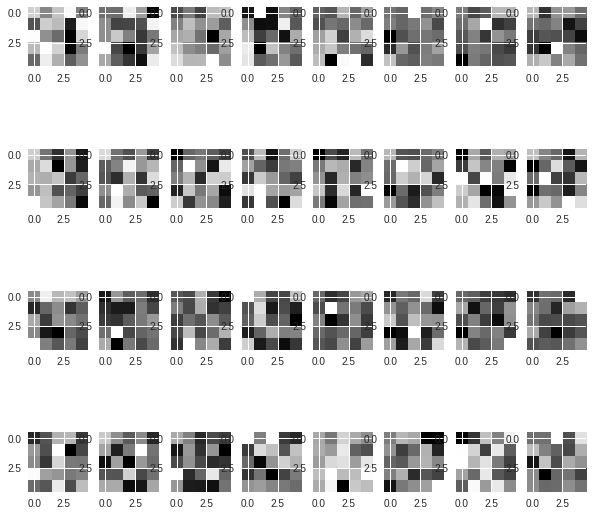

In [39]:
# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})

        if step % display_step == 0:
            # Calculate batch loss and accuracy
            l, acc = sess.run([loss, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y,
                                                              keep_prob: 1.})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(l) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
        step += 1
    print("Optimization Finished!")

    # Calculate accuracy for 256 mnist test images
    
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: mnist.test.images[:256],
                                      y: mnist.test.labels[:256], keep_prob: 1.}))

    filters = sess.run(weights['wc1'])
    f, a = plt.subplots(4, 8, figsize=(10, 10))
    for i in range(32):
        a[int(i/8)][i%8].imshow(np.reshape(filters[:,:,:,i], (5, 5)), cmap="gray")
    f.show()
